![ICL](Images/imperiallogo.jpeg)

# Introduction to bayesian methods in ecology and evolution

## Tuesday: 05 - Bayesian inference

Once we have specified the prior, we can use Bayes' theorem to obtain the posterior
distribution of model parameters.
However, the density (or cumulative) function can be difficult to interpret.
Therefore we want to summarise the information enclosed in these distributions.
We can use Bayesian techniques for point estimation, interval estimation and hypothesis testing.

### Point estimation

In the the univariate case we wish to select a summary feature of $p(\theta|{y})$ to obtain a point estimate 
$\hat{\theta}({y})$, which could be either its mean, median, or mode.

These features may behave very differently depending on the distribution, especially
when it is asymmetric and one-tailed.

<img src="Images/Elephants.jpeg" width="400" height="400" />

If $y=1$ and prior $G(0.5,1)$, what is the mean, mode and median of the posterior distribution?

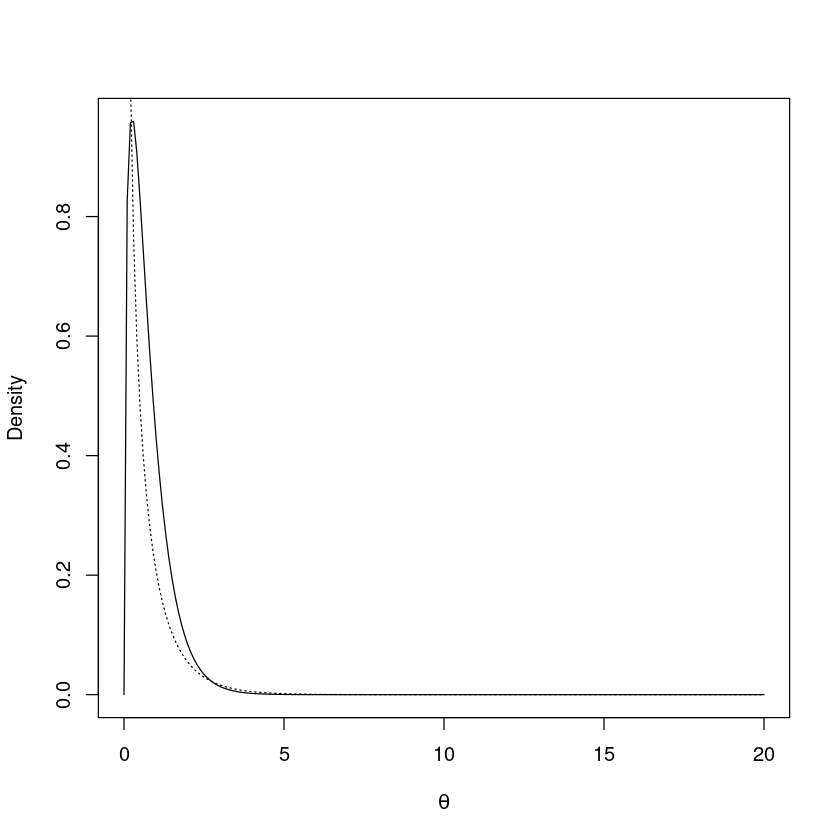

In [1]:
## Gamma posterior asymmetric, one-tailed prior
alpha <- 0.5
beta <- 1
theta <- seq(0, 20, 0.1) 

prior <- dgamma(x=theta, shape=alpha, scale=beta)
y <- 1

posterior <- dgamma(x=theta, shape=y+alpha, scale=1/(1+1/beta))
plot(x=theta, y=posterior, xlab=expression(theta), ylab="Density", type="l")
lines(theta, prior, lty=3)

Generally speaking, the __mode__ is the easiest to calculate.
Since no normalisation is required, we can work directly with the numerator.

If the prior distribution is flat, then the _posterior mode_ will be equal to the maximum likelihood estimate of $\theta$.
In this case, it is called the _generalised maximum likelihood_ estimate of $\theta$.

If the posterior distribution is symmetric, then the mean and the median are equivalent.

For symmetric unimodal distributions, all these three features are equivalent.

For asymmetric distributions, the median is often the best choice as it is less affected by outliers and it is an intermediate to the mode and the mean.

The _posterior variance_ is a measure of the accuracy for the point estimate $\hat{\theta}({y})$,
\begin{equation}
    \mathrm{Var}_{\theta|{y}}(\theta) = \mathrm{E}_{\theta|{y}}[\theta-\mathrm{E}_{\theta({y})}]^2 
\end{equation}

The posterior mean minimises the posterior variance in respect to $\hat{\theta}({y})$.

In the multivariate case, the posterior mode is
$\hat{\vec{\theta}}({y})=(\hat{\theta_1},\hat{\theta_2},...,\hat{\theta_k})$.

The posterior mean minimises the _posterior covariance matrix_ with respect to $\hat{\vec{\theta}}({y})$.

If the mode exists, maximisation methods (e.g. grid search, golden section search,
Newton-type methods, ...) are typically employed to locate the maximum.

### Credible intervals

The Bayesian analogue of a frequentist confidence interval is called a _credible set_.

A $100 \times (1-\alpha)$ credible set for ${\theta}$ is a subset $C$ of
${\Theta}$ such that
\begin{equation}
    1-\alpha \leq P(C|{y}) = \int_C p({\theta}|{y})d{\theta}
\end{equation}
in the continuous case.
In the discrete case the integral is replaced by a summation.

This definition can express a likelihood of $\theta$ falling in $C$ as "the probability that $\theta$ lies in $C$ given the observed data $y$ is at least $(1-\alpha)$".

Unlike the frequentist case, the credible set provides an actual probability statement, based on both the observed data and prior opinion.

In discrete settings it may not be possible to find the exact coverage probability $(1-\alpha)$.

In the continuous case, the _highest posterior density_ , or HPD credible set, is defined as
\begin{equation}
    C = \{ \theta \in \Theta : p(\theta|y) \geq k(\alpha) \}
\end{equation}
where $k(\alpha)$ is the largest constant satisfying $P(C|y)\geq(1-\alpha)$.

<img src="Images/Elephants.jpeg" width="400" height="400" />

Assume that the posterior distribution $p(\theta|{y}) \sim G(2,1)$.

In [ ]:
## Interval estimation
theta <- seq(0, 10, 0.05)
alpha <- 2
beta <- 1

posterior <- dgamma(x=theta, shape=alpha, scale=beta)

plot(x=theta, y=posterior, xlab=expression(theta), ylab="Posterior density", type="l")

For a unimodal distribution, the HPD is the narrowest interval with the highest probability density.

For instance, drawing a line at $k(\alpha)=0.1$ results in a $87\%$ HPD.

In [ ]:
plot(x=theta, y=posterior, xlab=expression(theta), ylab="Posterior density", type="l")
abline(h=0.1, lty=3)

 We can calculate the interval of values of $\theta$ included in the $87\%$ HPD.

In [ ]:
library(coda)

x <- rgamma(n=1e5, shape=alpha, scale=beta)
plot(x=theta, y=posterior, xlab=expression(theta), ylab="Posterior density", type="l")
hpd <- HPDinterval(as.mcmc(x), prob=0.87)
hpd
abline(h=0.1, lty=3)
abline(v=hpd, lty=2)

__ACTIVITY__

Another common strategy to obtain confidence intervals is to choose the interval where the probability of being below it is as likely as being above it.

For instance, in the previous example with $a=1-0.87$ assuming a $87\%$ HPD, the _equal-tailed interval_ corresponds to the $\{a/2,1-a/2\}$- quantiles of the distribution.
This interval includes the median and, if the distribution is symmetric, both credible intervals will be the same.

_Write a code to plot the posterior distribution $N(2,1)$ using Monte Carlo sampling and the equal-tailed interval with $a=1-0.90$._

How to summarise the posterior distribution:
* the posterior mean,
* several posterior percentiles (e.g. 0.025, 0.25, 0.50, 0.75, 0.975),
* a credible interval,
* posterior probabilities $p(\theta>c|y)$ where $c$ is a notable point (e.g. 0, 1, depending on the problem),
* a plot of the distribution to check whether it is unimodal, multimodal, skewed, etc etc.

### Hypothesis testing

The frequentist approach to compare predictions made by alternative scientific explanations is based on classic ideas of Fisher, Neyman and Pearson.

Typically, one formulates a null hypothesis $H_0$ and an alternative hypothesis $H_a$.
Then an appropriate test statistic is chosen $T({Y})$.
Finally, one computes the _observed significance_ , or _p_-value, of the test as the chance that $T({Y})$ is "more extreme" that $T(y_{obs})$, where the "extremeness" is towards the alternate hypothesis.
If the _p_-value is less than some threshold, typically in the form of a pre-specified Type I error rate, $H_0$ is rejected, otherwise it is not.

There are several criticisms to this approach:
* it is applied only when two hypotheses are nested, one within the other; typically, $H_0$ is a simplification of $H_a$ and involves setting one parameter of $H_a$ to some known constant value;
* it offers evidence _against_ the null hypothesis; a large _p_-value does not mean that the two models are equivalent, but only that we lack evidence of the contrary; we don't "accept the null hypothesis" but "fail to reject it";
* a _p_-value does not offer a direct interpretation in terms of weight of evidence but only as a long-term probability (a _p_-value is not the probability that $H_0$ is true!).

The Bayesian approach to hypothesis testing is simpler and more intuitive: one calculates the posterior probability that the each hypothesis is correct.

We can test as many models as desired, $M_i, i=1,...,m$.

Suppose we have two models $M_1$ and $M_2$ for data $Y$ and with parameters ${\theta}_1$ and ${\theta}_2$, respectively.

With prior densities $\pi_i({\theta}_i)$, with $i=1,2$, the marginal distributions of $Y$ are
\begin{equation}
    P(y|M_i) = \int f(y|\theta_i,M_i) \pi_i(\theta_i) d\theta_i
\end{equation}

Then the Bayes' theorem can be used to calculate the posterior probabilities $P(M_1|y)$ and $P(M_2|y)=1-P(M_1|y)$ for the two models.

A _Bayes factor_ (BF) is used to summarise these results, and it is equal to the ratio of
posterior odds of $M_1$ to the prior odds of $M_1$
\begin{equation}
    BF = \frac{P(M_1|y)/P(M_2|y)}{P(M_1)/P(M_2)}=\frac{p(y|M_1)}{p(y|M_2)}
\end{equation}

This equation is the ratio of observed marginal densities for the two models.

If the two models are _a priori_ equally probable, then
\begin{equation}
    BF = p(M_1|y) / p(M_2|y)
\end{equation}
which is the posterior odds of $M_1$.

The interpretation of BF is that it captures the change in the odds in favour of model 1 as we move from the prior to the posterior.

| BF | Strength of evidence|
| --- | -------- |
| 1 to 3 | not worth more than a bare mention|
| 3 to 20 | positive|
| 20 to 150 | strong|
| >150 | very strong|

### Intended Learning Outcomes

At the end of this part you are now be able to:
* describe the pros and cons of using different priors (e.g. elicited, conjugate, ...),
* evaluate the interplay between prior and posterior distributions,
* calculate several quantities of interest from posterior distributions,
* apply Bayesian inference to estimate population variation data.